## Разработка моделей прогнозирования
<a href="#ref1">Linear regression. Highway-L/100km' VS 'price</a>
<a href="#ref2">Engine-size VS Price. Linear regression </a>





<p> В этом разделе мы разработаем несколько моделей, которые будут предсказать цену автомобиля, используя переменные или функции.Это всего лишь оценка, но должна дать нам объективное представление о том, сколько стоит автомобиль. </P>


Некоторые вопросы, которые мы хотим задать в этом модуле
<ul>
    <li> Знаю ли я, предлагает ли дилер справедливую стоимость для моего обмена? </li>
    <li> Знаю ли я, если я выражу справедливую ценность на свою машину? </li>
</ul>
<p> В аналитике данных мы часто используем разработку модели <b>, чтобы помочь нам предсказать будущие наблюдения из данных, которые у нас есть. </p>.

<p> Модель поможет нам понять точную связь между различными переменными и тем, как эти переменные используются для прогнозирования результата. </p>


Импорт библиотеки:


In [69]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3-y
#! mamba install numpy=1.21.2-y
# mamba install sklearn=0.20.1-y
# импортирую обновленный сиборн 


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import math

Загрузите данные и сохраните их в DataFrame `df`:


In [71]:
# path of data 
df = pd.read_csv('C:/Users/admin/Desktop/python repo/DataAnalysis/analisys for prediction/Labs/clean_df.csv')
df.head()


,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,13495.0,11.190476,8.703704,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,16500.0,11.190476,8.703704,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,13950.0,9.791667,7.833333,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,17450.0,13.055556,10.681818,Low,0,1,1,0


In [72]:
df.drop("Unnamed: 0", axis = 1, inplace=True)

In [73]:
df.head(3)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,16500.0,12.368421,9.038462,Medium,0,1,1,0


# описание столбцов в сете данных:
 
марка автомобиля **(Make)**

аспирация **(aspiration)**

количество дверей **(num-of-doors)**

стиль кузова **(body-style)**

ведущие колеса	**(drive-wheels)**

расположение двигателя (**engine-location)**

колёсная база 	**(wheel-base)**

длина автомобиля **(length)**

степень сжатия	двигателя **(compression-ratio)**

лошадиная сила автомобиля	**(horsepower)**

пиковые обороты	**(peak-rpm)**

расход топлива на 100 км по городу	**(city-L/100km)**

расход топлива на 100 км по шоссе	**(highway-L/100km)**

цена автомобиля	**(price)**

мощность в лошадиных силах	**(horsepower-binned)** что то типа рейтинга, в градация мало, много, средне, относительно количественного показателя выборки в столбце лошадиные силы

дизель	**(diesel)** - дизельный автомобиль

газ **(gas)** - автомобиль на газу 

<h2> 1.Линейная регрессия и множественная линейная регрессия </h2>


<h4> Линейная регрессия </h4>


<p> Один пример модели данных, которую мы будем использовать: </p>
<b> простая линейная регрессия </b>

<br>
<p> Простая линейная регрессия - это метод, который поможет нам понять взаимосвязь между двумя переменными: </p>
<ul>
    <li> Предиктор/независимая переменная (x) </li>
    <li> Ответ/зависимая переменная (которую мы хотим предсказать) (y) </li>
</ul>

<p> Результатом линейной регрессии является линейная функция <b> </b>, которая предсказывает переменную ответа (зависимая) как функция переменной предиктора (независимой). </p>



$$
 Y: Response \ Variable\\\\
 X: Predictor \ Variables
$$


 <b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li> <b> А </b> относится к <b> intercept </b> линии регрессии, другими словами: <b>значение y, когда x - 0</b>  </li>
    <li> <b> В </b> относится к <b> наклону (SLOPE) линии регрессии</b>, другими словами: значение, с которым <b> y </b> меняется, когда <b> x </b> увеличивается на 1 единицу </li>
</ul>

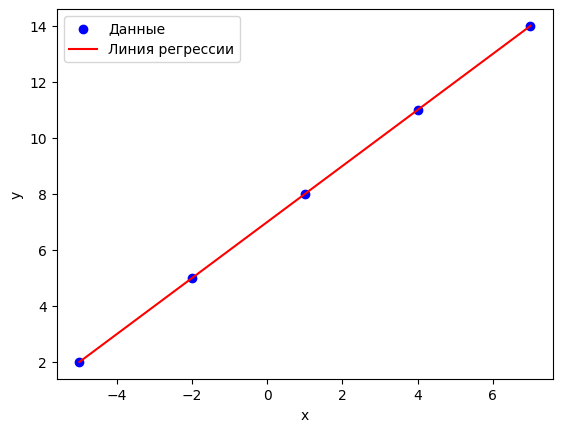

Наклон (slope): 0.9999999999999997
Пересечение (intercept): 7.000000000000002


In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем данные
x = np.array([-5, -2, 1, 4, 7])
y = np.array([2, 5, 8, 11, 14])

# Вычисляем коэффициенты линейной регрессии
slope, intercept = np.polyfit(x, y, 1)

# Создаем линию регрессии
regression_line = slope * x + intercept

# Строим график
plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x, regression_line, color='red', label='Линия регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Выводим значения наклона и пересечения
print('Наклон (slope):', slope)
print('Пересечение (intercept):', intercept)

На графике мы видим, что в момент когда х равен нулю - y = 7 - это как константа, когда х меняется на единицу, то y тоже меняется на 1 (0.99) - это наклон
Yhat = a(intersept = 7) + b (slope = 1) * X (предположим нам надо спрогнозировать у если х = 3)
Yhat = 7 + 1*3 = 10

In [75]:
# help(plt.scatter)

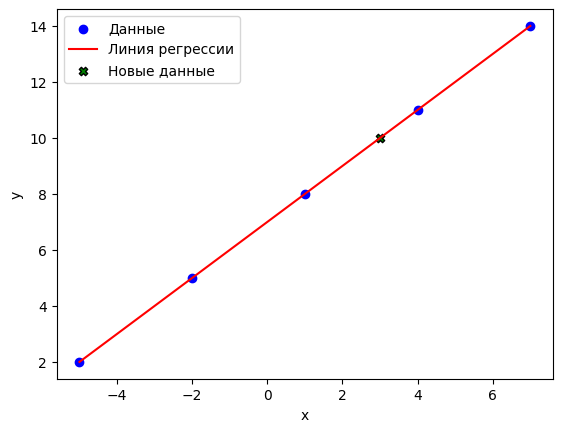

Наклон (slope): 0.9999999999999997
Пересечение (intercept): 7.000000000000002


In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем данные
x = np.array([-5, -2, 1, 4, 7])
y = np.array([2, 5, 8, 11, 14])

# Вычисляем коэффициенты линейной регрессии
slope, intercept = np.polyfit(x, y, 1)

# Создаем линию регрессии
regression_line = slope * x + intercept

# Строим график
plt.scatter(x, y, color='blue', label='Данные')

plt.plot(x, regression_line, color='red', label='Линия регрессии')
# Yhat = a(intersept = 7) + b (slope = 1) * X (предположим нам надо спрогнозировать у если х = 3)
# Yhat = 7 + 1*3 = 10
plt.scatter(3, 10, color='green', marker = 'X',  label ='Новые данные', edgecolors = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Выводим значения наклона и пересечения
print('Наклон (slope):', slope)
print('Пересечение (intercept):', intercept)

<h2 id="ref1">Linear regression. Highway-L/100km' VS 'price</h2>


<h3> Создать объект линейной регрессии для исследования вляния расхода топлива на стоимость автомобиля</h3>

X = df[['highway-L/100km']] - предиктор

Y = df[['price']]: - предикат 

In [77]:
lm_highwayVSprice = LinearRegression()
lm_highwayVSprice

LinearRegression()

<h4> Как расход топлива может помочь нам предсказать цену автомобиля? </h4>


Для этого примера мы хотим взглянуть на то, как highway-L/100km может помочь нам предсказать цену автомобиля.
Используя простую линейную регрессию, мы создадим линейную функцию с «highway-L/100km» в качестве переменной предиктора и «цена» в качестве переменной отклика.


In [78]:
x_highway = df[['highway-L/100km']]
y = df[['price']]

Установите линейную модель, используя highway-L/100km:


In [79]:
lm_highwayVSprice.fit(x_highway,y)

LinearRegression()

# Мы можем вывести прогноз  

ВВЕДЕМ ПАРАМЕТР ограничения  вывода  первыми пятью занчениями. **(X[0:5]отобразит первые 5 значений X . Y[0:5]отобразит первые 5 значений Y)**

ТО ЕСТЬ, наш прогноз выдаст первые 5 спрогнозированных значений цены:

In [80]:
# Predicted_price_highway - Yhat
Predicted_price_highway = lm_highwayVSprice.predict(x_highway)
Predicted_price_highway[0:5]   

array([[15503.87297521],
       [15503.87297521],
       [16660.76475578],
       [12495.95434571],
       [22340.05167861]])

<h4> Найдем значение у (цены) в тот момент когда х равен нулю относительно нашей модели? ( intercept - перехват, прямой отрезок) </h4>


In [81]:
lm_highwayVSprice.intercept_

array([-14575.31331976])

<h4>Найдем значение наклона SLOPE (как предикат меняется во время изменения предиктора на единицу)? </h4>


In [82]:
lm_highwayVSprice.coef_

array([[3455.90651049]])

<h3> Какую окончательную линейную модель мы получаем? </h3>

воспользуемся формулой 


Как мы видели выше, мы должны получить последнюю линейную модель со структурой:


$$
Yhat = a + b  X
$$


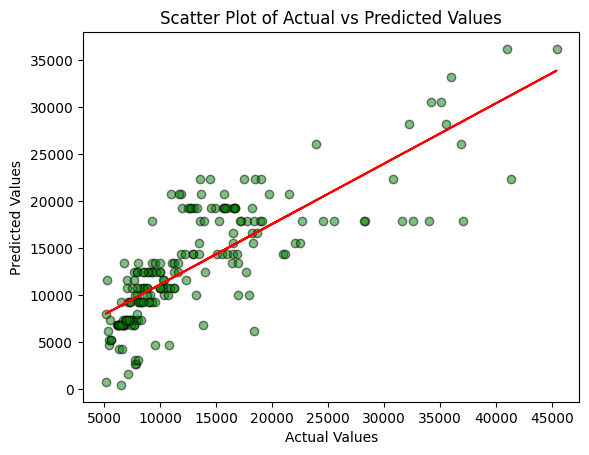

In [83]:
# actual values
y_actual = df['price']

# predicted values
y_predicted = Predicted_price_highway

# plot scatter plot
plt.scatter(y_actual, y_predicted, color = 'green', alpha = 0.5, marker = 'o', edgecolors ='black')

# add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')

# add regression line
slope, intercept = np.polyfit(y_actual, y_predicted, 1)
plt.plot(y_actual, slope*y_actual + intercept, color='red')

# show plot
plt.show()

На графике рассеяния, который мы построили, можно оценить, насколько фактические значения отличаются от предсказанных. Для этого можно посмотреть на расположение точек на графике относительно линии регрессии. Если точки расположены близко к линии, то это может указывать на то, что модель хорошо предсказывает значения. Если же точки расположены далеко от линии, то это может указывать на то, что модель плохо предсказывает значения.

Кроме того, для количественной оценки разницы между фактическими и предсказанными значениями можно использовать метрики оценки качества модели, такие как R-квадрат, MSE или MAE. Например, R-квадрат показывает, какую долю дисперсии зависимой переменной объясняет модель. Значение R-квадрат близкое к 1 указывает на хорошее качество модели, а значение близкое к 0 - на плохое качество модели. MSE и MAE показывают среднеквадратичную и среднюю абсолютную ошибку соответственно. Чем меньше эти метрики, тем лучше качество модели.

In [84]:
# actual values
y_actual = df['price']
# predicted values
y_predicted = Predicted_price_highway
# calculate R-squared
r2 = r2_score(y_actual, y_predicted)
# calculate MSE
mse = mean_squared_error(y_actual, y_predicted)
# calculate MAE
mae = mean_absolute_error(y_actual, y_predicted)
# print results
print('R-squared for highway-l/100km VS price:', r2)
print('MSE:', mse)
print('MAE:', mae)

R-squared for highway-l/100km VS price: 0.6416950471524439
MSE: 22694991.547928996
MAE: 3339.4147855028527


Исходя из значений метрик, можно сделать следующие выводы:

1. R-squared равен 0.64, что означает, что модель объясняет 64% дисперсии зависимой переменной. Это может быть улучшено путем добавления дополнительных признаков или использования более сложных моделей.

2. MSE равен 22694991.55, что означает, что средняя квадратичная ошибка предсказаний составляет около $4,764. Это может быть улучшено путем улучшения качества модели.

3. MAE равен 3339.41, что означает, что средняя абсолютная ошибка предсказаний составляет около $3,339. Это также может быть улучшено путем улучшения качества модели.

В целом, можно сказать, что модель имеет некоторую предсказательную способность, но ее качество может быть улучшено путем использования более сложных моделей или добавления дополнительных признаков. Также может быть полезно провести анализ выбросов и аномалий, чтобы улучшить качество модели.

Создаем объект линейной регресии для других параметров
LM1 - это объект линейной регрессии, который мы создаем с помощью класса LinearRegression(). 


In [85]:
lm_engine_size  = LinearRegression()
lm_engine_size

LinearRegression()


<b> тренировать модель, используя «размер двигателя» в качестве независимой переменной и «цена» в качестве зависимой переменной? </b>
</div>
x - это предиктор, который мы используем для предсказания цены. В данном случае мы используем столбец engine-size из нашего датафрейма df. 

y - это целевая переменная, которую мы пытаемся предсказать. В данном случае мы используем столбец price из нашего датафрейма df. 

In [86]:
# engine-size будет предиктором, предстказываемым значением как всегда будет цена
# Первые три строки кода (включая lm_engine_size, который является объектом линейной регресии) определяют переменные, которые будут использоваться в регрессионном анализе. 
x_engine_size = df[['engine-size']]
y = df ['price']
# Затем мы обучаем нашу линейную модель, используя метод fit(). Мы передаем ему наши предикторы x и целевую переменную y
lm_engine_size.fit(x_engine_size,y)
lm_engine_size


LinearRegression()

<details><summary>Второй вариант, без переменных - напрямую вписывать имя столбца</summary>

```python
lm1.fit(df[['engine-size']], df[['price']])
lm1
```

</details>



<h4>Slope</h4>



опять же ограничимся 5 значениями Yhat[0:5]

Мы используем метод predict() для получения предсказанных значений цены на основе нашей модели. Мы сохраняем эти значения в переменной Yhat. Затем мы выводим первые пять значений Yhat. 

In [87]:
# Predicted_price_engin --> Yhat
Predicted_price_engine=lm_engine_size.predict(x_engine_size)
Predicted_price_engine[0:5]
lm_engine_size.coef_   

array([166.99398606])

Мы используем атрибут coef_ для получения коэффициента наклона нашей линейной модели. В данном случае, результат равен 166.99398606. 

<h4>Intercept </h4> для обьекта линейной регрессии lm_engine_size


In [88]:
lm_engine_size.intercept_

-7935.433267801038

Мы используем атрибут intercept_ для получения значения пересечения нашей линейной модели с нулем. В данном случае, результат равен -7935.433267801038. 

Мы используем формулу линейной регрессии, чтобы получить предсказанные значения цены на основе нашей модели. Мы сохраняем эти значения в переменной Price. 

In [89]:
# Yhat = LM1.intercept_   + LM1.coef_ + столбец предиктора
# Yhat=-7935.433267801038 + 166.99398606 * X
Predicted_price_engine = lm_engine_size.intercept_ + lm_engine_size.coef_ * df['engine-size']
Predicted_price_engine

0      13773.784921
1      13773.784921
2      17447.652614
3      10266.911213
4      14775.748837
           ...     
194    15610.718767
195    15610.718767
196    20954.526321
197    16278.694712
198    15610.718767
Name: engine-size, Length: 199, dtype: float64

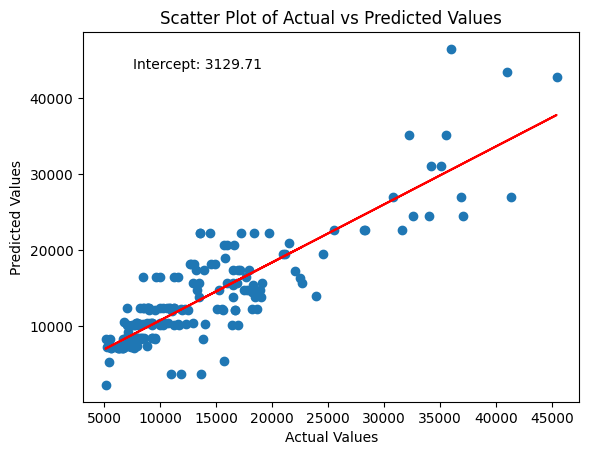

In [90]:
# actual values
y_actual = df['price']

# predicted values
y_predicted = Predicted_price_engine

# plot scatter plot
plt.scatter(y_actual, y_predicted)

# add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')

# add regression line
slope, intercept = np.polyfit(y_actual, y_predicted, 1)
plt.plot(y_actual, slope*y_actual + intercept, color='red')
# add intercept value as text label
plt.text(0.1, 0.9, f'Intercept: {intercept:.2f}', transform=plt.gca().transAxes)

# show plot
plt.show()

- Коэффициент наклона 166.99398606 означает, что при увеличении значения предиктора engine-size на единицу, цена увеличится на 166.99398606 денежных единиц. 
- Значение пересечения -7935.433267801038 означает, что при значении предиктора engine-size равном нулю, цена будет равна -7935.433267801038 денежных единиц. 
- Значения Price показывают предсказанные значения цены на основе нашей модели для каждого значения engine-size.

На графике рассеяния, который мы построили, можно оценить, насколько фактические значения отличаются от предсказанных. Для этого можно посмотреть на расположение точек на графике относительно линии регрессии. Если точки расположены близко к линии, то это может указывать на то, что модель хорошо предсказывает значения. Если же точки расположены далеко от линии, то это может указывать на то, что модель плохо предсказывает значения.

Кроме того, для количественной оценки разницы между фактическими и предсказанными значениями можно использовать метрики оценки качества модели, такие как R-квадрат, MSE или MAE. Например, R-квадрат показывает, какую долю дисперсии зависимой переменной объясняет модель. Значение R-квадрат близкое к 1 указывает на хорошее качество модели, а значение близкое к 0 - на плохое качество модели. MSE и MAE показывают среднеквадратичную и среднюю абсолютную ошибку соответственно. Чем меньше эти метрики, тем лучше качество модели.

Для вычисления этих метрик можно использовать функции из библиотеки scikit-learn в Python. Например, следующий код вычислит R-квадрат, MSE и MAE для модели линейной регрессии:

In [91]:
# actual values
y_actual = df['price']

# predicted values
y_predicted = Predicted_price_engine

# calculate R-squared
r2 = r2_score(y_actual, y_predicted)

# calculate MSE
mse = mean_squared_error(y_actual, y_predicted)

# calculate MAE
mae = mean_absolute_error(y_actual, y_predicted)

# print results
print('R-squared:', r2)
print('MSE:', mse)
print('MAE:', mae)


R-squared: 0.7636784045230649
MSE: 14968580.72800352
MAE: 2789.363292734953


Значение R-квадрат равное 0.76 говорит о том, что модель объясняет 76% дисперсии зависимой переменной. Это может быть приемлемым результатом, но также может быть улучшено.

Значение MSE равное 14968580.73 означает, что среднеквадратичная ошибка модели составляет около 14968580.73. Это означает, что средняя ошибка предсказания цены автомобиля составляет около 3868 долларов (корень из MSE).

Значение MAE равное 2789.36 означает, что средняя абсолютная ошибка модели составляет около 2789.36 долларов.

Таким образом, на основе этих метрик можно сделать вывод, что модель линейной регрессии может быть улучшена, но она все же может быть полезной для предсказания цен на автомобили.

# Множественная линейная регрессия


<p> Что если мы хотим предсказать цену автомобиля, используя более одной переменной? </p>

<p> Если мы хотим использовать больше переменных в нашей модели для прогнозирования цены на автомобиль, мы можем использовать <b> несколько линейных регрессий </b>.
Множественная линейная регрессия очень похожа на простую линейную регрессию, но этот метод используется для объяснения взаимосвязи между 

одной переменной непрерывной реакции (зависимой) и <b> двумя или более </b> предикторами (независимыми) переменными.
Большинство реальных регрессионных моделей включают несколько предикторов.

Мы проиллюстрируем структуру, используя четыре переменные предиктора, но эти результаты могут обобщить на любое целое число: </p>

$$
Y: Response \ Variable\\\\
X_1 :Predictor\ Variable \ 1\\\\
X_2: Predictor\ Variable \ 2\\\\
X_3: Predictor\ Variable \ 3\\\\
X_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\
b_1 :coefficients \ of\ Variable \ 1\\\\
b_2: coefficients \ of\ Variable \ 2\\\\
b_3: coefficients \ of\ Variable \ 3\\\\
b_4: coefficients \ of\ Variable \ 4\\\\
$$


Уравнение дано:


$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<p> Из предыдущего раздела мы знаем, что другие хорошие предикторы цен могут быть: </p>
<ul>
    <li> Мощность </li>
    <li> вес без груза и пасажиров </li>
    <li> Размер двигателя </li>
    <li> Расход по шоссе </li>
</ul>
Давайте разработаем модель, используя эти переменные в качестве переменных предиктора
положим все нужные переменные в одну переменную Z

In [149]:
Multy_paramethers = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

Установите линейную модель, используя четыре вышеупомянутые переменные.


Начало лабораторной работы:
1. Первые несколько строк кода определяют входные переменные x_highway и y, а затем подгоняют линейную регрессионную модель lm_highwayVSprice к данным, используя x_highway и y в качестве входных данных, так как модель плохо предсказывала цену и ее необходимо улучшить

2. Функция PlotPolly определена для построения графика полиномиальной подгонки данных. Она принимает четыре аргумента: объект модели, независимую переменную, зависимую переменную и имя независимой переменной.

3. Следующая строка кода вычисляет коэффициенты полинома третьей степени, подходящего к данным с помощью np.polyfit, и сохраняет их в переменной polinom_coef.

4. Функция np.poly1d используется для создания объекта полинома polinom_obj, который может быть использован для вычисления значения полинома в любой точке.

5. Объект полинома выводится на консоль с помощью оператора print.

6. Следующие несколько строк кода определяют новую входную переменную Muity_paramethers, которая содержит несколько входных переменных.

7. Затем модель lm_highwayVSprice подгоняется к новым входным данным Muity_paramethers и целевой переменной df['price'].

8. Значение R-квадрат модели выводится на консоль с помощью метода score объекта модели.

9. Метод predict объекта model используется для генерации предсказанных значений Y_predict_multifit для целевой переменной df['price'].

Исходная модель lm_highwayVSprice используется в полиномиальной регрессии, поскольку она уже была подогнана к целевой переменной df['price'] с помощью входной переменной x_highway. Затем полиномиальная регрессия выполняется с использованием коэффициентов полинома третьей степени, подходящего к данным, которые были рассчитаны с помощью np.polyfit. Новые входные данные Muity_paramethers используются для генерации прогнозных значений для целевой переменной df['price'] с использованием модели lm_highwayVSprice, которая уже была подогнана к данным.

In [150]:
lm_highwayVSprice.fit(Multy_paramethers, df['price'])

LinearRegression()

Каково значение перехвата (а)?


In [151]:
lm_highwayVSprice.intercept_

-14285.462035057453

Каковы значения коэффициентов (B1, B2, B3, B4)?


In [152]:
lm_highwayVSprice.coef_

array([ 37.05518795,   3.50307288,  85.95034797, 477.40895986])

In [158]:
lm_highwayVSprice.predict(Multy_paramethers)

(199,)

 Какова конечная предполагаемая линейная модель, которую мы получаем?


Как мы видели выше, мы должны получить последнюю линейную функцию со структурой:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

Какая линейная функция мы получаем в этом примере?


`Yhat = a(-14285) + (37.05 * Значение ячейки "horsepower") + (3.5 * Значение ячейки "curb-weight") + (85.95 * Значение ячейки "engine-size") + (477.4 * Значение ячейки "highway-L/100km")`

In [156]:
# предсказание цены на питоне (схема расчета метода predict)
# predict_sample = lm_highwayVSprice.intercept_ + (lm_highwayVSprice.coef_[0] * df['horsepower']) 
# + (lm_highwayVSprice.coef_[1] * df['curb-weight']) + (lm_highwayVSprice.coef_[2] * df['engine-size']) + (lm_highwayVSprice.coef_[3] * df['highway-L/100km'])
# predict_sample_row0 = -14285 + (37.05 * 111) + (3.5 * 2548) + (85.95 * 130) + (477.4 * 8.7)


0      24254.601079
1      24254.601079
2      27268.670167
3      21294.972780
4      26681.520858
           ...     
194    26466.895419
195    27287.512512
196    30298.539883
197    27887.412058
198    27333.052460
Length: 199, dtype: float64

In [162]:
Price_multy = lm_highwayVSprice.predict(Multy_paramethers)


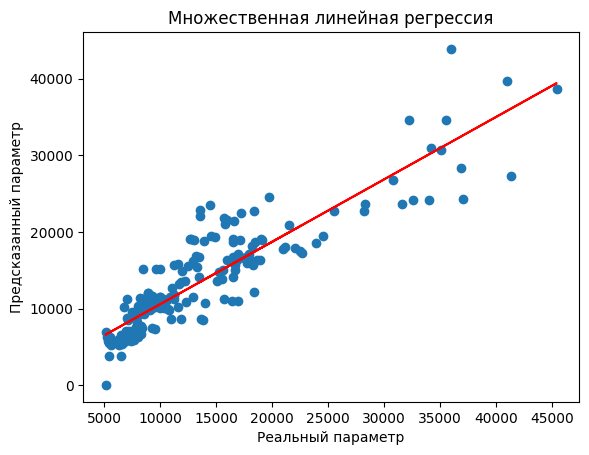

In [163]:
import matplotlib.pyplot as plt

# предсказанный параметр

predicted = Price_multy
# реальный параметр
real = df['price']

# создаем график
plt.scatter(real, predicted)

# добавляем заголовок и подписи осей
plt.title('Множественная линейная регрессия')
plt.xlabel('Реальный параметр')
plt.ylabel('Предсказанный параметр')
# add regression line
slope, intercept = np.polyfit(real, predicted, 1)
plt.plot(real, slope*real + intercept, color='red')

# выводим график на экран
plt.show()

In [166]:
import math
# actual values
real = df['price']
# predicted values
predicted = Price_multy
# calculate R-squared
r2 = r2_score(real, predicted)
# calculate MSE
mse = mean_squared_error(real, predicted)
# calculate MAE
mae = mean_absolute_error(real, predicted)
# print results
print('R-squared:', r2)
print('MSE:', mse)
print('MAE:', mae)
print('Root Mean Squared Error:', math.sqrt(mse))

R-squared: 0.8136734881143225
MSE: 11801898.295834249
MAE: 2421.8127973639093
Root Mean Squared Error: 3435.3891039930613


R-squared (коэффициент детерминации) - это мера того, насколько хорошо модель соответствует данным. Он может принимать значения от 0 до 1, где 1 означает, что модель идеально соответствует данным, а 0 означает, что модель не объясняет никакой дисперсии в данных. В нашем случае R2 описывает 81 проц дисперсии и подходит для прогнозирования.

MSE (среднеквадратичная ошибка) - это мера того, насколько сильно отличаются прогнозируемые значения от реальных значений. Он измеряется в квадрате единицы измерения целевой переменной. В вашем случае MSE равно 11801898.295834249, что означает, что среднеквадратичное отклонение прогнозируемых значений от реальных значений составляет около 11801898.295834249.

MAE (средняя абсолютная ошибка) - это мера того, насколько сильно отличаются прогнозируемые значения от реальных значений. Он измеряется в единицах измерения целевой переменной. В вашем случае MAE равно 2421.81, что означает, что среднее абсолютное отклонение прогнозируемых значений от реальных значений составляет около 2421.81.


Создайте и тренируйте модель множественной линейной регрессии , где переменная отклика «цена», а переменная предиктора-«нормализованные потери» и «расхрд топлива по шоссе».


In [102]:
lm_normalized_losses = LinearRegression()
lm_normalized_losses

LinearRegression()

In [103]:
# Write your code below and press Shift+Enter to execute 

Mult_reg_normalized_losses = df[["normalized-losses","highway-L/100km"]]
lm_normalized_losses.fit(Mult_reg_normalized_losses,df['price'])
lm_normalized_losses.coef_

array([   3.79680486, 3440.51321586])

<h2> 2.Оценка модели с использованием визуализации </h2>


Теперь, когда мы разработали несколько моделей, как мы оцениваем наши модели и выбираем лучшие?Один из способов сделать это - использовать визуализацию.


Импортируйте пакет визуализации, Seaborn:


In [104]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>


<p> Когда дело доходит до простой линейной регрессии, отличный способ визуализации соответствия нашей модели - использование графиков регрессии <b> </b>. </p>

<p> На этом графике будет показана комбинация разбросанных точек данных (A <b> Scatterplot </b>), а также установленную линейную регрессию </b>, проходящую через данные.Это даст нам разумную оценку взаимосвязи между двумя переменными, силой корреляции, а также направления (положительная или отрицательная корреляция). </P>

Давайте визуализируем ** расход топлива на 100 км** как потенциальная переменная предиктора цены:


(0.0, 47711.544938848056)

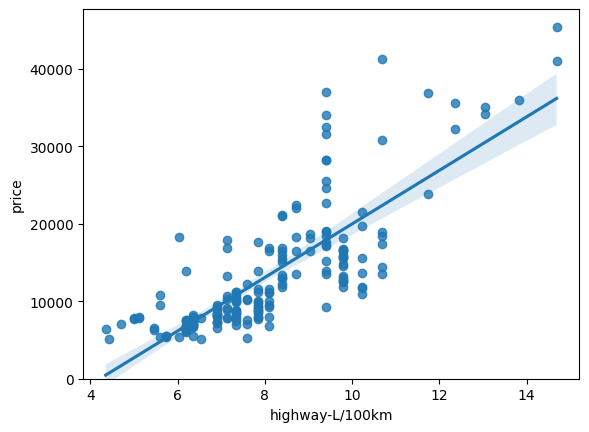

In [105]:
sns.regplot(x="highway-L/100km", y="price", data=df)
plt.ylim(0,)


<p> Из этого графика мы видим, что цена положительно коррелирует с расходом топлива, поскольку наклон регрессии положителен.

При рассмотрении сюжета регрессии есть одна вещь, чтобы обратить внимание на то, насколько разбросаны точки данных вокруг линии регрессии.Это даст вам хорошее представление о дисперсии данных и будет ли линейная модель лучше всего подходит или нет.

Если данные слишком далеко от линии, эта линейная модель может быть не лучшей моделью для этих данных.

Давайте сравним этот график с графиком регрессии «Пик-RPM». </P>


(0.0, 47414.1)

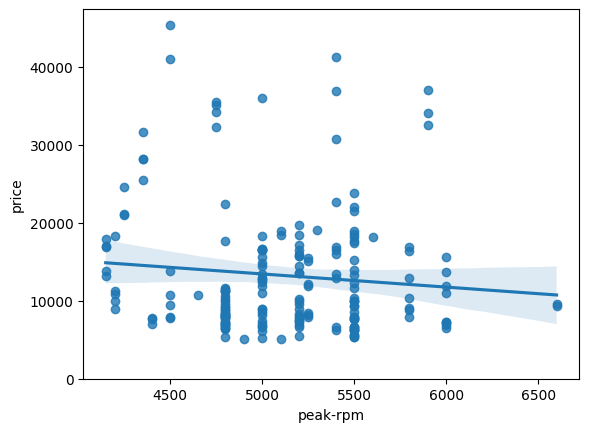

In [106]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p> Сравнивая график регрессии «peak-RPM» и «highway-l/100km», мы видим, что точки для «highway-l/100km» намного ближе к генерируемой линии и, в среднем, уменьшаются. Точки для «peak RPM» имеют больше распространения вокруг прогнозируемой линии, и гораздо сложнее определить, уменьшаются ли точки или увеличиваются по мере увеличения «peak RPM». </P>



<b>, учитывая графики регрессии выше, является ли «пик-RPM» или «расход топлива по шоссе» более сильно коррелирует с «ценой»?Используйте метод ".corr ()", чтобы проверить свой ответ. </B>
</div>


In [107]:
df[['peak-rpm', 'highway-L/100km','price']].corr()

,peak-rpm,highway-L/100km,price
peak-rpm,1.000000,0.017741,-0.101649
highway-L/100km,0.017741,1.000000,0.801059
price,-0.101649,0.801059,1.000000


 Переменная "highway-l/100km" имеет более сильную корреляцию с "ценой", она составляет приблизительно 0,8 по сравнению с "peak-rpm", которая составляет приблизительно -0,101616. 

<h3> остаточный график </h3>

<p> Хороший способ визуализации дисперсии данных - использовать остаточный график. </p>

<p> Что такое <b> остаточный </b>? </p>

<p> Разница между наблюдаемым значением (Y) и прогнозируемым значением (Yhat) называется остаточным (E).Когда мы смотрим на график регрессии, остаток - это расстояние от точки данных до установленной линии регрессии. </P>

<p> Итак, что такое остаточный график <b> </b>? </p>

<p> остаточный график-это график, который показывает остатки на вертикальной оси Y и независимая переменная на горизонтальной оси x. </p>

<p> На что мы обращаем внимание на остаточный сюжет? </p>

<p> мы смотрим на распространение остатков: </p>

<p>- Если точки в остаточном графике <b> случайным образом распределены вокруг оси x, то для данных подходит линейная модель <b> </b>.

Почему это?Случайно распределение остатков означает, что дисперсия постоянна, и, следовательно, линейная модель подходит для этих данных. </P>

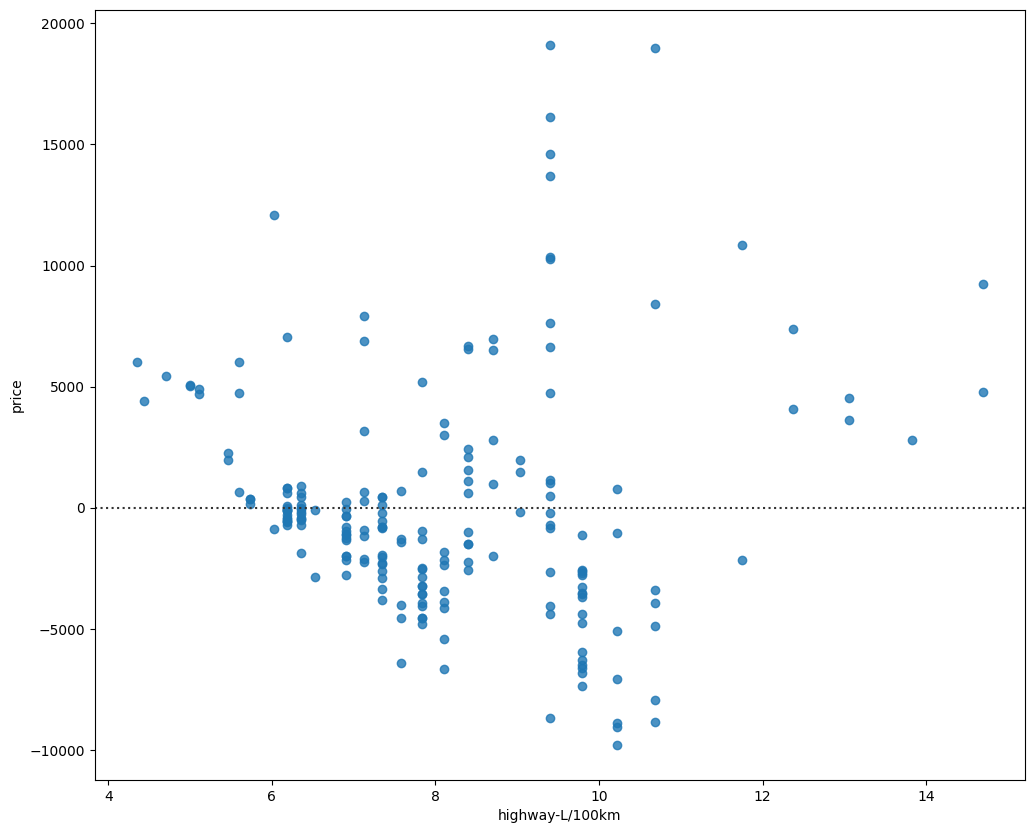

In [108]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-L/100km'], y=df['price'])
plt.show()

<i> Что этот сюжет говорит нам? </i>

<p> Из этого остаточного графика мы видим, что остатки не распространяются по оси x, что заставляет нас полагать, что, возможно, нелинейная модель более подходит для этих данных. </p>.


<h3>Multiple Linear Regression</h3>


<p> Как нам визуализировать модель для множественной линейной регрессии?Это становится немного сложнее, потому что вы не можете визуализировать его с регрессией или остаточным сюжетом. </P>

<p> Один из способов взглянуть на соответствие модели - посмотреть на график распределения <b> </b>.Мы можем посмотреть на распределение подходящих значений, которые возникают из модели, и сравнить его с распределением фактических значений. </P>


Во -первых, давайте сделаем прогноз:


In [109]:
Predicted_price_multyReg = lm_highwayVSprice.predict(Multy_paramethers)

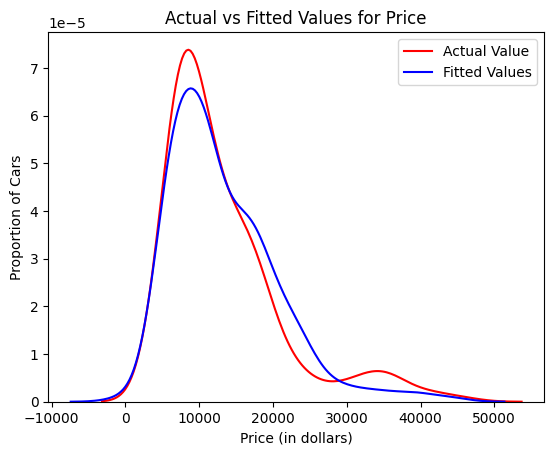

In [110]:
ax = sns.kdeplot(df['price'], color="r", label="Actual Value")
ax = sns.kdeplot(Predicted_price_multyReg, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.legend()
plt.show()
plt.close()

<p> Мы видим, что подходящие значения достаточно близки к фактическим значениям, поскольку два распределения немного перекрываются.Тем не менее, определенно есть место для улучшения. </P>


<h2> 3.Полиномиальная регрессия и конвейер </h2>


<p> <b> Полиномиальная регрессия </b> - это конкретный случай общей модели линейной регрессии или нескольких моделей линейной регрессии. </p>
<p> Мы получаем нелинейные отношения, квадратируя или установив условия более высокого порядка переменных предиктора. </p>

<p> Существуют разные порядки полиномиальной регрессии: </p>


<Chenter> <b> квадратичный - 2 -й порядок </b> </chenter>
$$
Yhat = a + b_1 X +b_2 X^2 
$$


<Chenter> <b> кубический - 3 -й порядок </b> </chenter>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3
$$


<Chenter> <b> высший порядок </b>: </chenter>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 
$$


<p> Ранее мы видели, что линейная модель не обеспечила наилучшего соответствия при использовании «расхода топлива по шоссе» в качестве переменной предиктора.Посмотрим, сможем ли мы попробовать подготовить полиномиальную модель для данных вместо этого. </P>


<p> Мы будем использовать следующую функцию для построения данных, в которую передается объект полинома, зависимая и независимая переменные и лейбл столбца ч: </p>


In [111]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(5, 15, 30)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Наши переменные:

x_highway = df['highway-L/100km']

y = df['price']


Давайте подгоняем многочлен, используя функцию <b> polyfit </b>, затем используйте функцию <b> poly1d </b> для отображения полиномиальной функции.


In [112]:
x_highway = df['highway-L/100km']
y = df['price']
# Here we use a polynomial of the 3rd order (cubic) 
polinom_coef = np.polyfit(x_highway, y, 3) # f
polinom_obj = np.poly1d(polinom_coef) # p
print(polinom_obj)

        3         2
-22.88 x + 907.9 x - 6937 x + 2.11e+04


Конечная цель полиномиальной регрессии - найти уравнение полинома, которое наилучшим образом соответствует данным. В данном случае мы хотим найти полином третьей степени, который наилучшим образом описывает зависимость между переменной x_highway и переменной y.

Функция np.polyfit в Python находит коэффициенты этого полинома третьей степени, используя метод наименьших квадратов. Этот метод находит такие коэффициенты, которые минимизируют сумму квадратов разностей между реальными значениями переменной y и значениями, которые предсказывает полином.

После того, как коэффициенты полинома были найдены, функция np.poly1d создает объект полинома, который может быть использован для вычисления значений полинома в любой точке. Например, если мы хотим узнать, какое значение предсказывает полином для x_highway = 10, мы можем использовать объект полинома, созданный с помощью функции np.poly1d, и вызвать его с параметром 10. Результатом будет значение, которое предсказывает полином для x_highway = 10.


Давайте построим функцию:


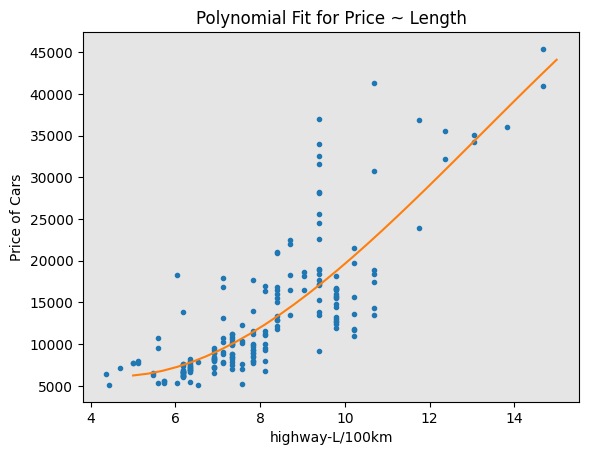

In [113]:
PlotPolly(polinom_obj, x_highway, y,'highway-L/100km')

In [114]:
np.polyfit(x_highway, y, 3)

array([  -22.88104602,   907.88893794, -6936.68197809, 21097.91112568])

<p> Мы уже можем видеть на графике, что эта полиномиальная модель работает лучше, чем линейная модель.Это связано с тем, что   в сгенерированную полиномиальную функцию "попадает" больше точек данных. </P>



<b> Создать 11 -х порядок полиномиальной модели с переменными x и y. </b>
</div>


          11          10         9         8             7            6
0.003537 x  - 0.4724 x  + 26.83 x - 869.1 x + 1.801e+04 x - 2.52e+05 x
              5             4             3             2
 + 2.438e+06 x - 1.635e+07 x + 7.464e+07 x - 2.211e+08 x + 3.83e+08 x - 2.941e+08


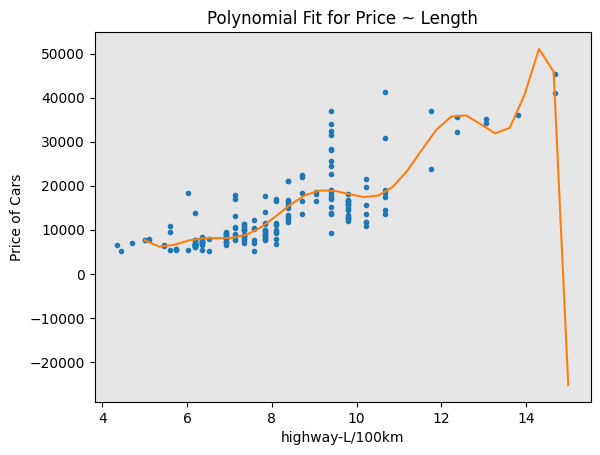

In [115]:
# Write your code below and press Shift+Enter to execute 
polinom_coef_11  = np.polyfit(x_highway, y, 11)
polinom_obj_11 = np.poly1d(polinom_coef_11)
print(polinom_obj_11)
PlotPolly(polinom_obj_11, x_highway, y,'highway-L/100km')


<p> Аналитическая экспрессия для многомерной полиномиальной функции усложняется.Например, выражение для полинома второго порядка (степень = 2) с двумя переменными определяется как: </p>


$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


Мы можем выполнить полиномиальное преобразование в нескольких функциях.Сначала мы импортируем модуль:


In [116]:
from sklearn.preprocessing import PolynomialFeatures

Мы создаем <b> полиномиал свойства </b> объект степени 2:


In [117]:
PolynomialFeatures_2=PolynomialFeatures(degree=2)
PolynomialFeatures_2

PolynomialFeatures()

In [118]:
# Muity_paramethers = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
Multy_paramethers_pol_features=PolynomialFeatures_2.fit_transform(Multy_paramethers)

В исходных данных есть 199 образцы и 4 функции.


In [119]:
Multy_paramethers.shape

(199, 4)

После преобразования есть 199 образцы и 15 функций.


In [120]:
Multy_paramethers_pol_features.shape

(199, 15)

<h2>Pipeline</h2>


<p> Piplines данных упрощают шаги обработки данных.Мы используем модуль <b> Pipeline </b> для создания конвейера.Мы также используем <b> standardscaler </b> в качестве шага в нашем конвейере (pipeline). </P>


In [121]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Мы создаем конвейер, создав список кортежей, включая название модели или оценки и его соответствующий конструктор.


In [122]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Мы вводим список в качестве аргумента в конструктор конвейера:


In [123]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Во -первых, мы преобразуем тип данных типа Z в тип Float, чтобы избежать предупреждений о преобразовании, которые могут появиться в результате того, что стандарты принимают входные данные.

Затем мы можем нормализовать данные, выполнить преобразование и подгонять модель одновременно.


In [124]:
# # Muity_paramethers = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
Multy_paramethers = Multy_paramethers.astype(float)
pipe.fit(Multy_paramethers, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Точно так же мы можем нормализовать данные, выполнить преобразование и одновременно произвести прогноз.


In [125]:
ypipe=pipe.predict(Multy_paramethers)
ypipe[0:4]

array([12441.37030435, 12441.37030435, 18470.6469597 , 10019.83749456])


<b> Создайте конвейер, который стандартизирует данные, а затем создает прогноз, используя модель линейной регрессии, используя функции Z и Target y. </b>
</div>

In [126]:

Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe1=Pipeline(Input)

pipe1.fit(Multy_paramethers,y)

ypipe=pipe1.predict(Multy_paramethers)
ypipe[0:10]


array([14082.26490685, 14082.26490685, 18689.70707731, 10789.13991592,
       16657.40543816, 14749.70390903, 15930.23947117, 16315.57748849,
       18581.79806371, 10998.26790105])

<h2> 4.Меры для оценки в выборке </h2>


<p> При оценке наших моделей мы не только хотим визуализировать результаты, но и мы также хотим, чтобы количественная мера определила, насколько точна модель. </p>.

<p> Две очень важные меры, которые часто используются в статистике для определения точности модели: </p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, Также известен как коэффициент определения, является мерой, чтобы указать, насколько близки данные к установленной линии регрессии.</p>
    
<p>Значение R-квадрата-это процент изменения переменной отклика (Y), которая объясняется линейной моделью./p>



<b>Mean Squared Error (MSE)</b>

<p>Средняя квадратная ошибка измеряет среднее значение квадратов ошибок.То есть разница между фактическим значением (y) и оцененным значением (ŷ). </P>


<h3> Модель 1: Простая линейная регрессия </h3>


Давайте рассчитаем R^2:


In [127]:
x_highway = df[['highway-L/100km']]

In [128]:
#highway_l/100km_fit
lm_highwayVSprice.fit(x_highway, y)
# Find the R^2
print('The R-square is: ', lm_highwayVSprice.score(x_highway, y))

The R-square is:  0.6416950471524439


Можно сказать, что ~ 64,19% от изменения цены объясняется этой простой линейной моделью "Horsepower_fit".


Давайте рассчитаем MSE:


Мы можем предсказать выход, то есть «yhat», используя метод прогноза, где x - входная переменная:


In [129]:
Yhat=lm_highwayVSprice.predict(x_highway)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [15503.87297521 15503.87297521 16660.76475578 12495.95434571]


Давайте импортируем функцию <b> mean_squared_error </b> из модуля <b> metrics </b>:


In [130]:
from sklearn.metrics import mean_squared_error
import math

Мы можем сравнить прогнозируемые результаты с фактическими результатами:


In [131]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', math.sqrt(mse), 'USD')

The mean square error of price and predicted value is:  4763.926064490191 USD


<h3> Модель 2: множественная линейная регрессия </h3>


Давайте рассчитаем R^2:


In [132]:
# fit the model 
lm_highwayVSprice.fit(Multy_paramethers, df['price'])
# Find the R^2
print('The R-square is: ', lm_highwayVSprice.score(Multy_paramethers, df['price']))

The R-square is:  0.8136734881143225


Можно сказать, что ~ 81,36 % от изменения цены объясняется этой множественной линейной регрессией "multi_fit".


Давайте рассчитаем MSE.


Мы производим прогноз:


In [133]:
Y_predict_multifit = lm_highwayVSprice.predict(Multy_paramethers)

Мы сравниваем прогнозируемые результаты с фактическими результатами:


In [134]:
print('The root mean square error of price and predicted value using multifit is: ', \
      math.sqrt(mean_squared_error(df['price'], Y_predict_multifit)))

The root mean square error of price and predicted value using multifit is:  3435.3891039930613


<h3>Модель 3: Полетка полинома</h3>


Давайте рассчитаем R^2.


Давайте импортируем функцию <b> r2_score </b> из модуля <b> метрик </b>, поскольку мы используем другую функцию.


In [135]:
from sklearn.metrics import r2_score

Применяем функцию, чтобы получить значение R^2:


In [136]:
r_squared = r2_score(y, polinom_obj(x_highway))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6748857263951564


Можно сказать, что ~ 67,419 % от изменения цены объясняется этим полиномиальным соответствием.


<h3>MSE</h3>


Мы также можем рассчитать MSE:


In [137]:
math.sqrt(mean_squared_error(df['price'], polinom_obj(x_highway)))

4537.917806202503

<h2> 5.Прогноз и принятие решений </h2>
<h3> прогноз </h3>

<p> В предыдущем разделе мы обучили модель, используя метод <b> fit </b>.Теперь мы будем использовать метод <b> прогноз </b> для получения прогнозирования.Давайте импортировать <b> pyplot </b> для построения;Мы также будем использовать некоторые функции от Numpy. </p>


In [138]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Создайте новый ввод:

Данный код используется для предсказания значений цены  на основе модели множественной линейной регрессии, которая была обучена на некоторых исходных данных (Z). 

Первая строка создает новый входной массив new_input, который содержит последовательность чисел от 1 до 100 с шагом 1. Этот массив создается с помощью функции np.arange в Python и затем преобразуется в двумерный массив с помощью метода reshape(-1, 1). Это делается для того, чтобы массив new_input имел форму, которая может быть использована в качестве входных данных для метода predict модели множественной линейной регрессии.

Затем, после того как была обучена модель множественной линейной регрессии на исходных данных X и Y, используется метод predict для предсказания значений цены домов на основе нового входного массива new_input. Результаты предсказаний сохраняются в переменной yhat.

Последняя строка yhat[0:5] выводит первые 5 предсказанных значений цены домов.

In [139]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)


Установите модель:


In [140]:
lm_highwayVSprice.fit(x_highway, y)
lm_highwayVSprice

LinearRegression()

Прогнозируем:


In [141]:
yhat=lm_highwayVSprice.predict(new_input)
yhat[0:5]

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-11119.40680928,  -7663.50029879,  -4207.5937883 ,   -751.68727782,
         2704.21923267])

Мы можем построить данные:


In [142]:
import numpy as np
import matplotlib.pyplot as plt

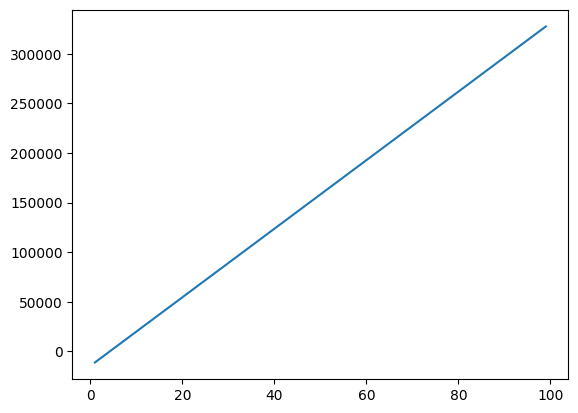

In [143]:
plt.plot(new_input, yhat)
plt.show()

<h3> Принятие решений: определение хорошей модели Fit </h3>


<P> Теперь, когда мы визуализировали различные модели и сгенерировали значения R-Squared и MSE для подгонки, как мы определяем хорошую модель подгонки?
<ul>
    <li> <i> Что такое хорошее значение R-квадрат? </i> </li>
</ul>
</p>

<p> При сравнении моделей <b> модель с более высоким значением R-квадрата лучше подходит для данных.
<ul>
    <li> <i> Что такое хороший mse? </i> </li>
</ul>
</p>

<p> При сравнении моделей <b> модель с наименьшим значением MSE лучше подходит для данных. </p>


<h4> давайте посмотрим на значения для разных моделей. </h4>
<p> Простая линейная регрессия: использование расхода топлива по шоссе в качестве переменной предиктора цены.
<ul>
    <li> r-squared: 0,49659118843391759 </li>
    <li> MSE: 3.16 x10^7 </li>
</ul>
</p>
    
<p> Многочисленная линейная регрессия: использование мощности, бордюр, размер двигателя и шоссе-MPG в качестве предиктора переменных цен.
<ul>
    <li> r-squared: 0,80896354913783497 </li>
    <li> MSE: 1,2 x10^7 </li>
</ul>
</p>
    
<p> Полиномиальная подгонка: использование шоссе-MPG в качестве переменной предиктора цены.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3> Простая модель линейной регрессии (SLR) против нескольких линейной модели регрессии (MLR) </H3>

<p> Обычно, чем больше у вас переменных, тем лучше ваша модель в прогнозировании, но это не всегда верно.Иногда у вас может быть недостаточно данных, вы можете столкнуться с числовыми проблемами, или многие из переменных могут быть бесполезными и даже действовать как шум.В результате вы всегда должны проверять MSE и r^2. </P>

<p> Чтобы сравнить результаты моделей MLR против SLR, мы рассматриваем комбинацию как R-квадрат, так и MSE, чтобы сделать наилучший вывод о соответствии модели.
<ul>
    <li> <b> mse </b>: MSE SLR составляет 3,16x10^7, в то время как MLR имеет MSE 1,2 x10^7.MSE MLR намного меньше. </Li>
    <li> <b> r-squared </b>: в этом случае мы также можем увидеть, что существует большая разница между R-квадратным размером SLR и R-квадратом MLR.R-квадрат для SLR (~ 0,497) очень мал по сравнению с R-квадратом для MLR (~ 0,809). </Li>
</ul>
</p>

Этот R-квадрат в сочетании с MSE показывает, что MLR кажется лучшей моделью в этом случае по сравнению с SLR.


<h3> Простая линейная модель (SLR) против полиномиальной подгонки </h3>


<ul>
    <li> <b> mse </b>: мы видим, что полиномиальная подгонка сбила MSE, поскольку эта MSE меньше, чем у SLR. </li>
    <li> <b> r-squared </b>: R-квадрат для полиномиального прилегаli>
</ul>
<p> Поскольку полиномиальная подгонка привела к более низкому MSE и более высокому R-квадрату, мы можем сделать вывод, что это была лучшая модель соответствия, чем простая линейная регрессия для прогнозирования «цены» с «шоссе-MPG» в качестве переменной предиктора.</p>


<h3> множественная линейная регрессия (MLR) по сравнению с полиномиальной подгонкой </h3>


<ul>
    <li> <b> mse </b>: MSE для MLR меньше MSE для полиномиальной подгонки. </li>
    <li> <b> r-squared </b>: R-квадрат для MLR также намного больше, чем для полиномиальной подгонки. </li>
</ul>

<h2> Заключение </h2>


<p> Сравнивая эти три модели, мы заключаем, что <b> модель MLR является лучшей моделью </b>, чтобы иметь возможность прогнозировать цену из нашего набора данных.Этот результат имеет смысл, так как у нас есть 27 переменных, и мы знаем, что более чем одна из этих переменных является потенциальным предиктором окончательной цены на автомобиль. </P>

In [144]:
df.to_csv('clean_df.csv')